In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the viscous Burgers’ equation, u_t+uu_x=αu_xx, where u(x,t) is the velocity component along the x−direction, and α is the kinematic viscosity.  Solve this 1D equation in a periodic domain of size 1.0 for the following cases.  Use ∆t= 0.0004,t_end= 0.075, and u(x,0) =sin(4πx) +sin(6πx) +sin(10πx).

Using Euler and first order upwind schemes to solve the equation with α= 0 for a grid resolution of 64 and 1024.

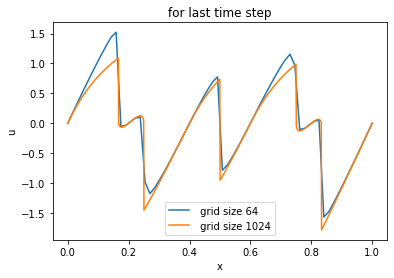

In [2]:
def f(nx):
  dt=0.0004
  #nx=1024
  dx=1/(nx-1)
  k=dt/dx
#print(k)
  tend=0.075
  nt=tend/dt
  nt=int(nt)+1
  x=np.zeros((nx))
  u=np.zeros((nx))
  unew=np.zeros((nx))
  for i in range(nx):
    x[i]=dx*i
  t=np.zeros((nt))
  for i in range(nt):
    t[i]=dt*i
  #IC's
  for i in range(1,nx-1):
    u[i]=np.sin(4*np.pi*x[i])+np.sin(6*np.pi*x[i])+np.sin(10*np.pi*x[i])
  for i in range(1,nt):
    for j in range(1,nx-1):
      if(u[j]>0):
        unew[j]=u[j]-((k*u[j])*(u[j]-u[j-1]))
      else:
        unew[j]=u[j]-((k*u[j])*(u[j+1]-u[j]))
    u=unew
  return(x,u)
x1,u1=f(64)

np.savetxt("x1",x1)
np.savetxt("u1",u1)

plt.plot(x1,u1,label=" grid size 64")
x2,u2=f(1024)

np.savetxt("x2",x2)
np.savetxt("u2",u2)

plt.plot(x2,u2,label=" grid size 1024")
plt.xlabel("x")
plt.ylabel("u")
plt.title("for last time step")
plt.legend()
plt.savefig("onea1.png")
plt.show()

Using Euler and second order central difference schemes to solve the equation with α= 0.001 for a grid resolution of 1024. 

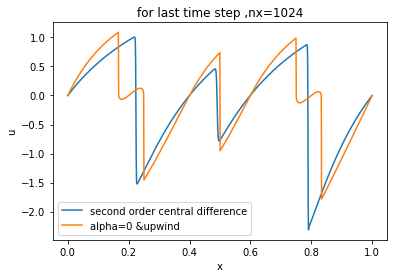

In [3]:
def f(nx):
  dt=0.0004
  #nx=1024
  dx=1/(nx-1)
  k=dt/dx
  alpha=0.001
  r1=dt*alpha
  r2=dx*dx
  r=r1/r2
#print(k)
  tend=0.075
  nt=tend/dt
  nt=int(nt)+1
  x=np.zeros((nx))
  u=np.zeros((nx))
  unew=np.zeros((nx))
  for i in range(nx):
    x[i]=dx*i
  t=np.zeros((nt))
  for i in range(nt):
    t[i]=dt*i
  #IC's
  for i in range(1,nx-1):
    u[i]=np.sin(4*np.pi*x[i])+np.sin(6*np.pi*x[i])+np.sin(10*np.pi*x[i])
  for i in range(1,nt):
    for j in range(1,nx-1):
      unew[j]=u[j]-((k*u[j]/2.0)*(u[j+1]-u[j-1]))+(r)*(u[j+1]-2*u[j]+u[j-1])
    u=unew
  return(x,u)
x1,u1=f(1024)
np.savetxt("cds",u1)
plt.plot(x1,u1,label="second order central difference")

def f1(nx):
  dt=0.0004
  #nx=1024
  dx=1/(nx-1)
  k=dt/dx
#print(k)
  tend=0.075
  nt=tend/dt
  nt=int(nt)+1
  x=np.zeros((nx))
  u=np.zeros((nx))
  unew=np.zeros((nx))
  for i in range(nx):
    x[i]=dx*i
  t=np.zeros((nt))
  for i in range(nt):
    t[i]=dt*i
  #IC's
  for i in range(1,nx-1):
    u[i]=np.sin(4*np.pi*x[i])+np.sin(6*np.pi*x[i])+np.sin(10*np.pi*x[i])
  for i in range(1,nt):
    for j in range(1,nx-1):
      if(u[j]>0):
        unew[j]=u[j]-((k*u[j])*(u[j]-u[j-1]))
      else:
        unew[j]=u[j]-((k*u[j])*(u[j+1]-u[j]))
    u=unew
  return(x,u)

x2,u2=f1(1024)

plt.plot(x2,u2,label="alpha=0 &upwind")
plt.xlabel("x")
plt.ylabel("u")
plt.title("for last time step ,nx=1024")
plt.legend()
plt.savefig("oneb.png")
plt.show()

Error calculations

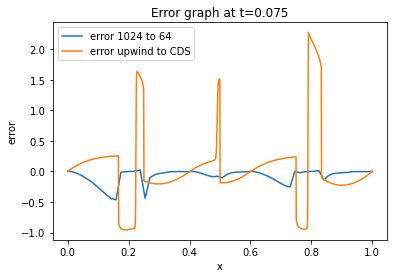

In [5]:
y64=np.loadtxt('u1')
x64=np.zeros((64))
dx64 = 1.0/63
for i in range(64):
  x64[i]=dx64*i

y1024=np.loadtxt('u2')

x1024=np.zeros((1024))
dx1024 = 1.0/1023
for i in range(1024):
  x1024[i]=dx1024*i

ycds1024=np.loadtxt('cds')

# Interpolating 1024 to 64 solution
def interpolate(old_vec):
  new_vec = []
  for i in range(64):
    required = int(np.floor((i*dx64)/dx1024))
    if(required != 1023):
      new_val = 0.5*old_vec[required]+0.5*old_vec[required+1]
    else:
      new_val = old_vec[required]
    new_vec.append(new_val)
  return new_vec

# Error calculation
y_true = interpolate(y1024)
e_64=np.zeros((64))
e_1024=np.zeros((1024))
for i in range(64):
  e_64[i] = y_true[i] - y64[i]
for i in range(1024):  
  e_1024[i] = y1024[i] - ycds1024[i]

#Ploting error
plt.plot(x64,e_64,label='error 1024 to 64')
plt.plot(x1024,e_1024,label='error upwind to CDS')


plt.title("Error graph at t=0.075")
plt.xlabel('x')
plt.ylabel('error')
plt.legend()
plt.savefig('error_075.png')
plt.show()